# CNNHMM vs cnnLSTM

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         9
     disgust       1.00      1.00      1.00         2
     fearful       1.00      1.00      1.00         7
       happy       1.00      1.00      1.00         6
    neautral       1.00      1.00      1.00        14
         sad       1.00      1.00      1.00         8
   surprised       1.00      1.00      1.00         3

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

Normalized confusion matrix
              precision    recall  f1-score   support

       angry       0.83      1.00      0.91         5
     disgust       1.00      0.88      0.93         8
     fearful       1.00      1.00      1.00         4
       happy       1.00      1.00      1.00         9
    neautral       1.00      1.00      1.00        11
         sad       1.00      1.00      1.00       

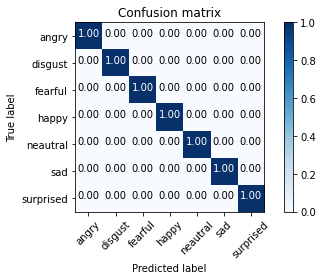

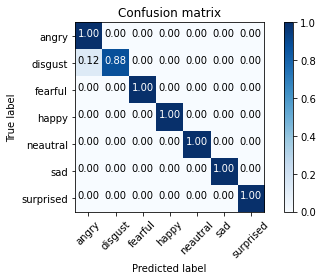

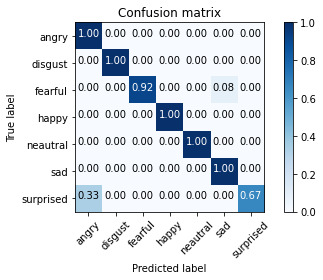

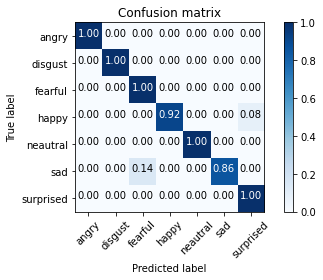

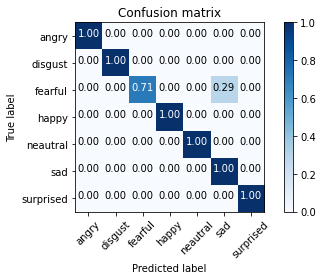

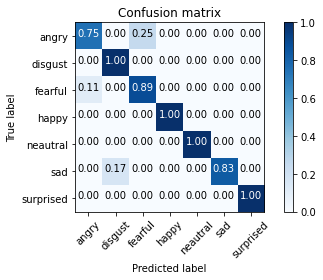

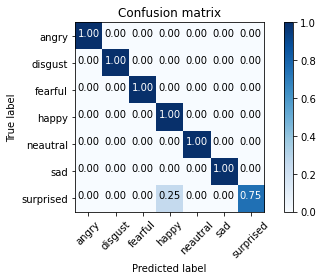

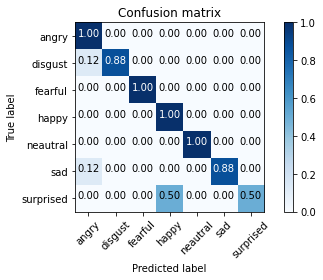

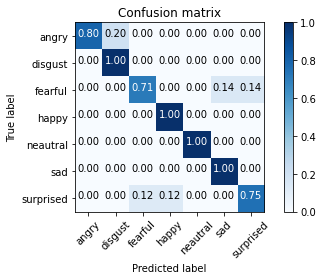

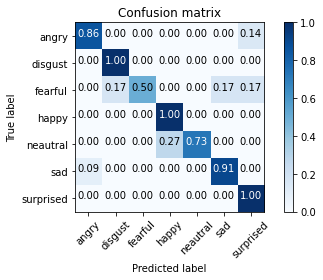

In [16]:
# -*- coding: utf-8 -*-
"""SVM_fussion.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1SUZbxopNhMGrPUf2tKMdd48Iv6shFo02
"""
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from confusion_matrix import plot_confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

X1 = np.load('SVM_test/CNNHMM_predict.npy') #video predict
X11 = np.load('SVM_test/emotion_40frames_pred.npy') #video predict
X2 = np.load("SVM_test/speech_predict.npy") #speech predict
X21 = joblib.load('SVM_test/speech_prediction') #CNN speech predict
y = np.load("SVM_test/y_test.npy") #label
y = np.argmax(y, axis=-1)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

from random import randint
data_count = len(X1)

X_true = np.zeros((data_count,2))
for i in range(data_count):
  X_true[i] = [X1[i],X2[i]]
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
import time 
fold_num=10
kfold = KFold(n_splits=fold_num,shuffle=True,random_state=5576)
results=0
predict_result=[]
a = time.time()
for train,test in kfold.split(X_true):
    x_train,x_test=X_true[train],X_true[test]
    y_train,y_test=y[train],y[test]
    n_comp = 2


    cf = svm.SVC()
    cf.fit(x_train,y_train)
    y_pred = cf.predict(x_test)

    target_names = ['angry', 'disgust', 'fearful','happy','neautral','sad','surprised']

    cnf_matrix = confusion_matrix(y_test,y_pred)

    np.set_printoptions(precision=2)
    print(classification_report(y_test,y_pred,target_names=target_names))
    # Plot non-normalized confusion matrix

    result=accuracy_score(y_test,y_pred)
    results+=result
    predict_result.append(result)
    cnf_matrix = confusion_matrix(y_test,y_pred)

    np.set_printoptions(precision=2)
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)


# Update plot object with X/Y axis labels and Figure Title


print(time.time()-a)
print("平均測試率:(%.3f)"%(results/fold_num))
print(time.time()-a)  
for i in range(len(predict_result)):
  print("The %dth fold is %.3f"%(i,predict_result[i]))





# CNN LSTM vs Speech

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00         2
           2       0.86      0.75      0.80         8
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        15
           5       0.71      1.00      0.83         5
           6       0.75      1.00      0.86         3

    accuracy                           0.92        49
   macro avg       0.90      0.93      0.91        49
weighted avg       0.93      0.92      0.92        49

[[ 7  0  1  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  6  0  0  2  0]
 [ 0  0  0  7  0  0  1]
 [ 0  0  0  0 15  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  3]]
Normalized confusion matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89

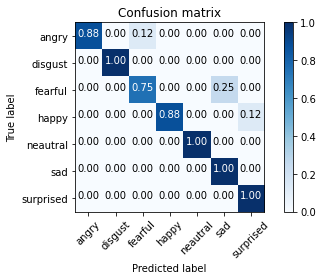

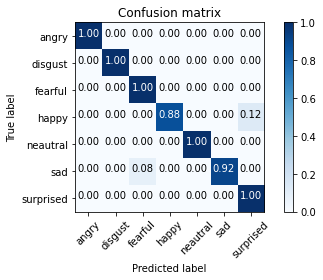

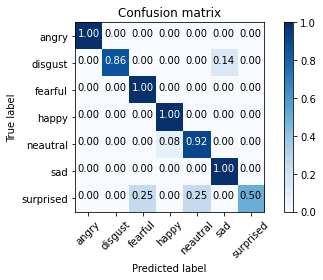

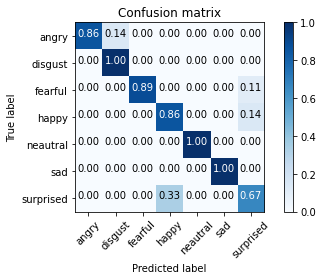

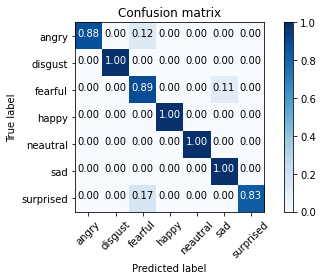

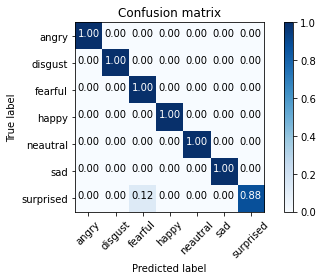

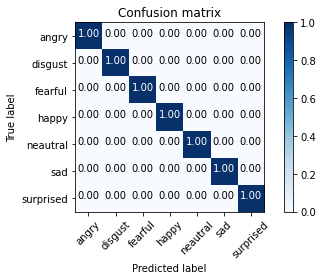

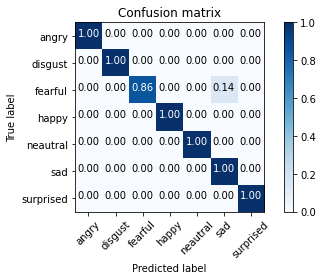

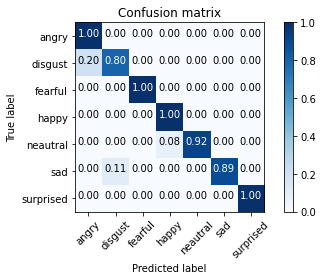

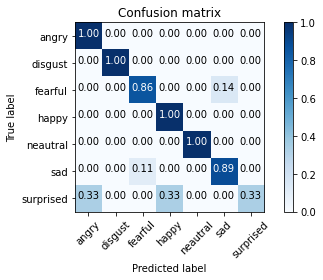

In [18]:

data_count = len(X11)
X_true = np.zeros((data_count,2))
for i in range(data_count):
  X_true[i] = [X11[i],X2[i]]

kfold = KFold(n_splits=10,shuffle=True,random_state=1)
results=0
a = time.time()
for train,test in kfold.split(X_true):
    x_train,x_test=X_true[train],X_true[test]
    y_train,y_test=y[train],y[test]
    n_comp = 2

    pca = PCA(n_comp)  

    # finding pca axes
    pca.fit(x_train)
    # projecting training data onto pca axes
    x_train_proj = pca.transform(x_train)
    # projecting test data onto pca axes
    x_test_proj = pca.transform(x_test)
    cf = svm.SVC()
    cf.fit(x_train_proj,y_train)
    y_pred1 = cf.predict(x_test_proj)


    print(classification_report(y_test, y_pred1))
    print(confusion_matrix(y_test,y_pred1))
    results+=accuracy_score(y_test,y_pred1)
    cnf_matrix = confusion_matrix(y_test,y_pred1)

    np.set_printoptions(precision=2)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
print(time.time()-a)
print("平均測試率:",results/10)
print(time.time()-a)

# CNN LSTM vs CNN Speech

              precision    recall  f1-score   support

       angry       1.00      0.88      0.93         8
     disgust       1.00      1.00      1.00         2
     fearful       0.86      0.75      0.80         8
       happy       1.00      0.88      0.93         8
    neautral       1.00      1.00      1.00        15
         sad       0.71      1.00      0.83         5
   surprised       0.75      1.00      0.86         3

    accuracy                           0.92        49
   macro avg       0.90      0.93      0.91        49
weighted avg       0.93      0.92      0.92        49

Normalized confusion matrix
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         5
     disgust       1.00      1.00      1.00         4
     fearful       1.00      1.00      1.00         4
       happy       0.88      0.88      0.88         8
    neautral       0.92      1.00      0.96        12
         sad       1.00      0.83      0.91       

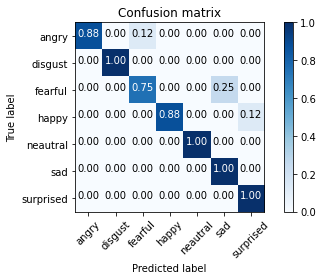

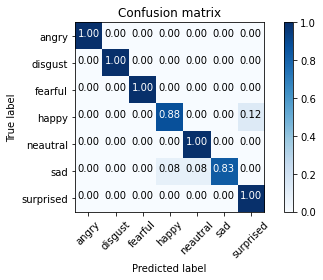

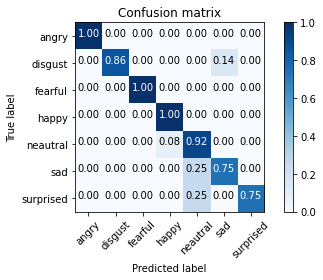

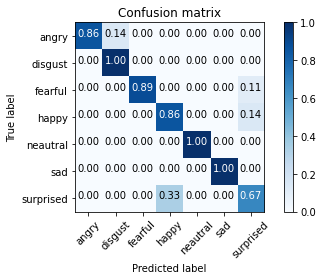

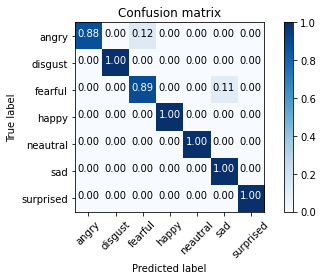

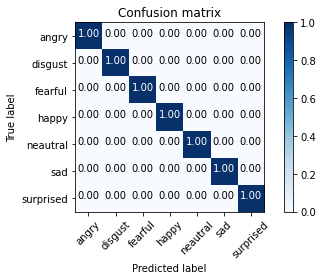

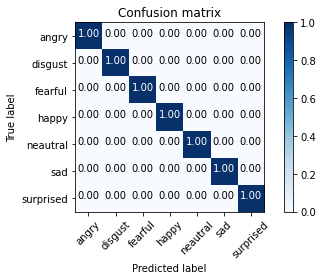

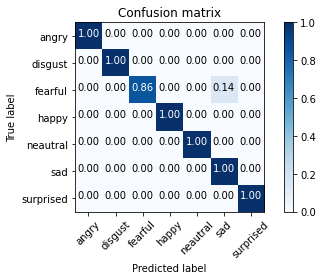

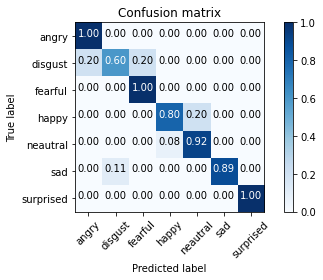

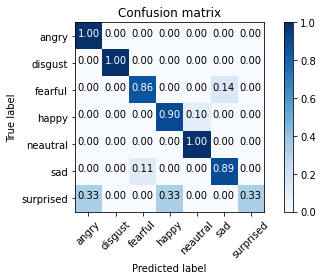

In [19]:

data_count = len(X11)
X_true = np.zeros((data_count,2))
for i in range(data_count):
  X_true[i] = [X11[i],X21[i]]

kfold = KFold(n_splits=10,shuffle=True,random_state=1)
results=0
a = time.time()
predict_result=[]
for train,test in kfold.split(X_true):
    x_train,x_test=X_true[train],X_true[test]
    y_train,y_test=y[train],y[test]
    n_comp = 2


    cf = svm.SVC()
    cf.fit(x_train,y_train)
    y_pred = cf.predict(x_test)

    target_names = ['angry', 'disgust', 'fearful','happy','neautral','sad','surprised']
    print(classification_report(y_test,y_pred,target_names=target_names))
    # Plot non-normalized confusion matrix

    result=accuracy_score(y_test,y_pred)
    results+=result
    predict_result.append(result)
    cnf_matrix = confusion_matrix(y_test,y_pred)

    np.set_printoptions(precision=2)
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
print(time.time()-a)
print("平均測試率:(%.3f)"%(results/fold_num))
print(time.time()-a)  
for i in range(len(predict_result)):
  print("The %dth fold is %.3f"%(i,predict_result[i]))